# HW4_ASSIGNMENT 4.

# 1.

In [1]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os

%pylab inline

if os.getenv ('PUI2016') is None:
    print ("Must set env variable PUI2016")
if os.getenv ('PUIDATA') is None:
    print ("Must set env variable PUI2016")

Populating the interactive namespace from numpy and matplotlib


In [3]:
def getCitiBikeCSV(datestring):
    print ("Downloading", datestring)
    ### First I will heck that it is not already there
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            # if in the current dir just move it
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        #otherwise start looking for the zip file
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
                ###  To move it I use the os.system() functions to run bash commands with arguments
                os.system("mkdir " + os.getenv("PUIDATA"))
                os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
            ### unzip the csv 
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip -d " + os.getenv("PUIDATA") )
            ## NOTE: old csv citibike data had a different name structure. 
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
                os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    ### One final check:
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")

In [26]:
datestring = '201501'
getCitiBikeCSV(datestring)

file in place, you can continue


In [27]:
df=pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
# df is the dataframe where the content of the csv file is stored
df['date'] = pd.to_datetime(df['starttime'])
# note that with dataframes I can refer to variables as dictionary keys, 
# i.e. df['starttime'] or as attributes: df.starttime. 
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2,2015-01-01 00:01:00
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1,2015-01-01 00:02:00
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1,2015-01-01 00:04:00
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1,2015-01-01 00:04:00
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1,2015-01-01 00:05:00


In [21]:
rows = df.shape[0]
rows

285552

In [28]:
num = np.arange(0,rows,200)
subsample = df.iloc[num,:]
subsample.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2,2015-01-01 00:01:00
200,571,1/1/2015 1:36,1/1/2015 1:46,297,E 15 St & 3 Ave,40.734232,-73.986923,394,E 9 St & Avenue C,40.725213,-73.977688,18003,Subscriber,1965.0,1,2015-01-01 01:36:00
400,364,1/1/2015 2:52,1/1/2015 2:58,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,347,W Houston St & Hudson St,40.728739,-74.007488,21664,Subscriber,1989.0,1,2015-01-01 02:52:00
600,284,1/1/2015 7:02,1/1/2015 7:07,300,Shevchenko Pl & E 7 St,40.728145,-73.990214,503,E 20 St & Park Ave,40.738274,-73.987520,15694,Subscriber,1957.0,1,2015-01-01 07:02:00
800,650,1/1/2015 9:41,1/1/2015 9:52,394,E 9 St & Avenue C,40.725213,-73.977688,293,Lafayette St & E 8 St,40.730287,-73.990765,14994,Customer,NaN,0,2015-01-01 09:41:00


In [36]:
subsample['ageM'] = 2016 - subsample['birth year'][(subsample['usertype'] == 'Subscriber') & (subsample['gender'] == 1)]
subsample['ageF'] = 2016 - subsample['birth year'][(subsample['usertype'] == 'Subscriber') & (subsample['gender'] == 2)]
subsample.head()

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date,ageM,ageF
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2,2015-01-01 00:01:00,NaN,56.0
200,571,1/1/2015 1:36,1/1/2015 1:46,297,E 15 St & 3 Ave,40.734232,-73.986923,394,E 9 St & Avenue C,40.725213,-73.977688,18003,Subscriber,1965.0,1,2015-01-01 01:36:00,51.0,NaN
400,364,1/1/2015 2:52,1/1/2015 2:58,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,347,W Houston St & Hudson St,40.728739,-74.007488,21664,Subscriber,1989.0,1,2015-01-01 02:52:00,27.0,NaN
600,284,1/1/2015 7:02,1/1/2015 7:07,300,Shevchenko Pl & E 7 St,40.728145,-73.990214,503,E 20 St & Park Ave,40.738274,-73.987520,15694,Subscriber,1957.0,1,2015-01-01 07:02:00,59.0,NaN
800,650,1/1/2015 9:41,1/1/2015 9:52,394,E 9 St & Avenue C,40.725213,-73.977688,293,Lafayette St & E 8 St,40.730287,-73.990765,14994,Customer,NaN,0,2015-01-01 09:41:00,NaN,NaN


In [37]:
subsample['ageM'].dropna(inplace= True)
subsample['ageF'].dropna(inplace= True)

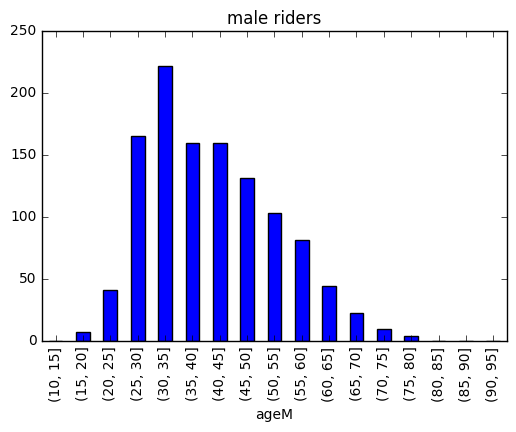

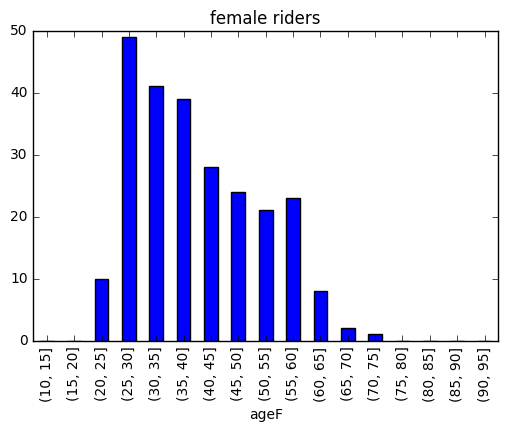

In [39]:
bins = np.arange(10, 99, 5)
axM = subsample.ageM.groupby(pd.cut(subsample.ageM, bins)).agg([count_nonzero]).plot(kind='bar', 
                                                                legend=False)
axM.set_title("male riders")
axF = subsample.ageF.groupby(pd.cut(subsample.ageF, bins)).agg([count_nonzero]).plot(kind='bar',
                                                                legend=False)
axF.set_title("female riders")

          count_nonzero
ageM                   
(10, 15]       0.000000
(15, 20]       0.006108
(20, 25]       0.001234
(25, 30]       0.053974
(30, 35]       0.027796
(35, 40]       0.047589
(40, 45]       0.022666
(45, 50]       0.005917
(50, 55]       0.001405
(55, 60]       0.024220
(60, 65]       0.018346
(65, 70]       0.007279
(70, 75]       0.003490
(75, 80]       0.000000
(80, 85]       0.000000
(85, 90]       0.000000
(90, 95]       0.000000


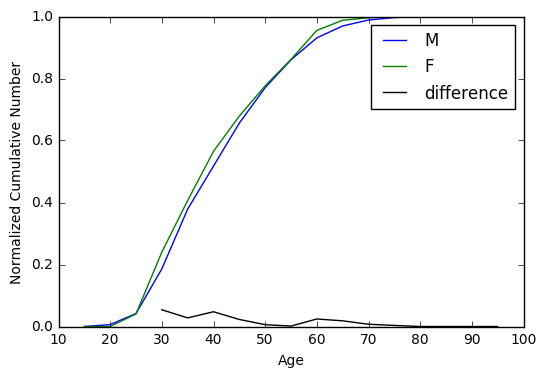

In [41]:
csM=subsample.ageM.groupby(pd.cut(subsample.ageM, bins)).agg([count_nonzero]).cumsum()

csF=subsample.ageF.groupby(pd.cut(subsample.ageF, bins)).agg([count_nonzero]).cumsum()

print (np.abs(csM / csM.max()-csF / csF.max()))

pl.plot(bins[:-1] + 5, csM / csM.max(), label = "M")
pl.plot(bins[:-1] + 5, csF / csF.max(), label = "F")
pl.plot(bins[:-1] + 5, np.sqrt(csF / csF.max() - csM / csM.max())**2, 'k-',
        label = "difference")
pl.xlabel("Age")
pl.ylabel("Normalized Cumulative Number")
pl.legend()

In [42]:
import scipy.stats

ks = scipy.stats.ks_2samp(subsample.ageM, subsample.ageF)
print (ks)

Ks_2sampResult(statistic=0.10841998568198413, pvalue=0.015689150327056155)


The ks_2samp return the k-s statistics and p-value. 
Because P(value) < 0.05, we reject the null hypothesis.

# 2. Pearson's test for correlation

In [58]:
df['ageM'] = 2016 - df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 1)]
df['ageF'] = 2016 - df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 2)]
df['ageM'].dropna(inplace= True)
df['ageF'].dropna(inplace= True)
df_M = df['ageM'].tolist()
df_F = df['ageF'].tolist()
df_M.sort()
df_F.sort()
print (len(df_M),len(df_F))
df_M = df_M[0:len(df_F)]
len(df_M)
##scipy.stats.pearsonr(df['ageM'], df['ageF'])

227764 52093


52093

In [59]:
scipy.stats.pearsonr(df_M, df_F)

(0.90787057319226405, 0.0)

The P-value < 0.05, we reject Null hypothesis. 

They have relationship

# 3. Spearman's test for correlation

In [60]:
scipy.stats.spearmanr(df_M, df_F)

SpearmanrResult(correlation=0.99224073483735076, pvalue=0.0)

The P-value < 0.05, we reject Null hypothesis.

They have relationship